### K-means clustering - example 1

Ex.1 Please analyse the function parameters and generated output.

In [1]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [2]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

Ex.3 Analyse the x and y shape.

In [3]:
X.shape

(120, 2)

In [4]:
y.shape

(120,)

Ex.4 Plot the data samples in X to see the clusters.

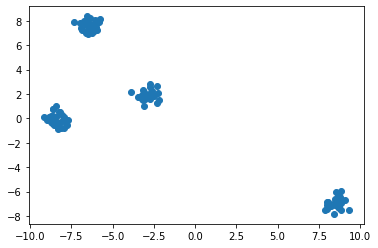

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

Ex.5 Run the implemented KMeans function, fit the model and predict the outcome.

In [6]:
from sklearn.cluster import KMeans

model = KMeans(init='random', n_clusters=4)
model.fit(X, y)
pred = model.predict(X)

Ex.6 Plot the results in order to see whether the clustering worked.

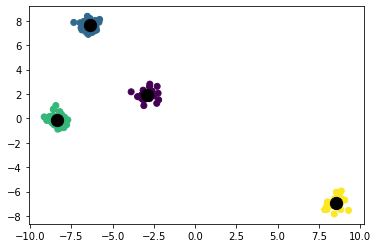

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150);

Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional).

In [8]:
from jqmcvi import dunn # downloaded and pasted the library next to this notebook

k_list = [ [] for _ in range(4) ]
for i, pr in enumerate(pred):
    k_list[pr].append(X[i,:])
    
print("Inertia:", model.inertia_)
print("Dunn:", dunn(k_list))

Inertia: 36.720519778534786
Dunn: 2.302996347199709


### K-means clustering - example II

Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

- Ex.1 Plot the data
- Ex.2 Predict for the same nb. of clusters = 5.

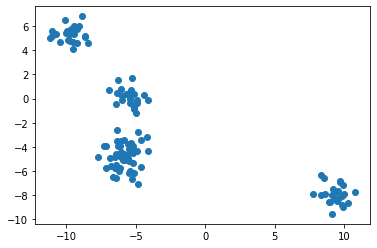

In [9]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1])

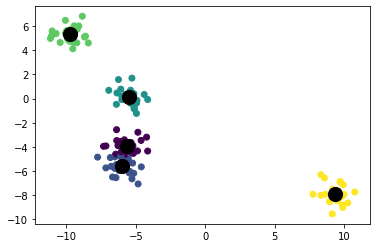

In [10]:
model = KMeans(init='random', n_clusters=5)
model.fit(X, y)
pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200);

In [11]:
k_list = [ [] for _ in range(5) ]
for i, pr in enumerate(pred):
    k_list[pr].append(X[i,:])
    
print("Inertia:", model.inertia_)
print("Dunn:", dunn(k_list))

Inertia: 115.39558434809962
Dunn: 0.06290281629777869


Ex.3 Predict for 2 instead of 5 clusters.

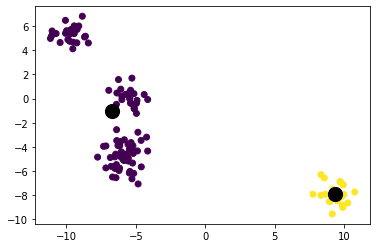

In [12]:
model = KMeans(init='random', n_clusters=2)
model.fit(X, y)
pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200);

In [13]:
k_list = [ [] for _ in range(2) ]
for i, pr in enumerate(pred):
    k_list[pr].append(X[i,:])
    
print("Inertia:", model.inertia_)
print("Dunn:", dunn(k_list))

Inertia: 2114.189107576426
Dunn: 0.8557830951353307


### K-means++

Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function: `init='k-means++'`

Ex.2 Calculate inertia or Dunn index.

In [14]:
model = KMeans(init='k-means++', n_clusters=5)
model.fit(X,y)
pred = model.predict(X)

k_list = [ [] for _ in range(5) ]
for i, pr in enumerate(pred):
    k_list[pr].append(X[i,:])
    
print("Inertia:", model.inertia_)
print("Dunn:", dunn(k_list))

Inertia: 115.39558434809962
Dunn: 0.06290281629777869


### Elbow method

Please implement the elbow method to choose the correct parameter value for k.

- Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.
- Ex.2 Plot the distortions of K-Means.

Maximum number of a clasters is 20

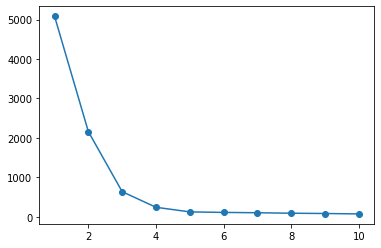

In [15]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

cluster_cnt = range(1, 11)
inertia_values = [KMeans(init='k-means++', n_clusters=clusters).fit(X, y).inertia_ for clusters in cluster_cnt];
plt.plot(cluster_cnt, inertia_values, marker='o')

### Ex.

Please check whether the K-Means algorithm will correctly cluster the data:

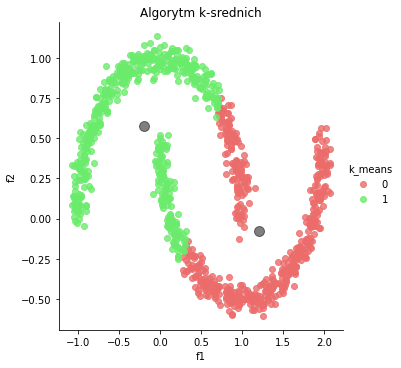

In [16]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

model = KMeans(init='k-means++', n_clusters=2)
model.fit(x, y)
y_km = model.predict(x)
centers = model.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

It's not - it (the moons) is classical example when K-means does not perform well